# 1.Load the data file using pandas. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("googleplaystore.csv")

In [3]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [4]:
y =df.iloc[:,2]

In [5]:
y

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    NaN
10839    4.5
10840    4.5
Name: Rating, Length: 10841, dtype: float64

In [6]:
x =df.iloc[:,[0,3,4,5,6,7,8,9,10,11,12]]

In [7]:
x

,App,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# 2.Check for null values in the data. Get the number of null values for each column.

In [8]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# 3.Drop records with nulls in any of the columns. 

In [9]:
df.dropna(inplace=True)

In [ ]:
Variables seem to have incorrect type and inconsistent formatting. You need to fix them: 

Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.

Extract the numeric value from the column

Multiply the value by 1,000, if size is mentioned in Mb

Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

Installs field is currently stored as string and has values like 1,000,000+. 

Treat 1,000,000+ as 1,000,000

remove ‘+’, ‘,’ from the field, convert it to integer


# 4.Variables seem to have incorrect type and inconsistent formatting. You need to fix them: 

Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.

Extract the numeric value from the column

Multiply the value by 1,000, if size is mentioned in Mb

In [10]:
df.shape


(9360, 13)

In [11]:
df["Size"]



0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, Length: 9360, dtype: object

In [12]:
df = df[-df["Size"].str.contains("Var")]

In [13]:
df["Size"]

0         19M
1         14M
2        8.7M
3         25M
4        2.8M
         ... 
10833    619k
10834    2.6M
10836     53M
10837    3.6M
10840     19M
Name: Size, Length: 7723, dtype: object

# Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

In [15]:
df.loc[:,"sizenum"] = df["Size"].str.rstrip('Mk+')
#df.sizenum = pd.to_numeric(df["sizenum"])

In [16]:
df.sizenum = pd.to_numeric(df["sizenum"])

In [17]:
df.sizenum.dtype

dtype('float64')

In [18]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'sizenum'],
      dtype='object')

In [19]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,sizenum
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7


In [20]:
import numpy as np

In [21]:
df["sizenum"] = np.where(df["Size"].str.contains("M") , df["sizenum"]*1000 , df["sizenum"])



In [22]:
df["Size"] = df["sizenum"] #copy all values of sizenum to size col

In [23]:
df.drop("sizenum",axis=1,inplace=True)

In [24]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


# Installs field is currently stored as string and has values like 1,000,000+. 

Treat 1,000,000+ as 1,000,000

remove ‘+’, ‘,’ from the field, convert it to integer

In [25]:
df.Reviews = pd.to_numeric(df.Reviews)



In [26]:
df["Reviews"].dtype



dtype('int64')

In [27]:
df['Installs']=df.Installs.str.replace("+","")
df.Installs=df.Installs.str.replace(",","")
df.Installs=pd.to_numeric(df.Installs)
df.Installs.dtype

<ipython-input-27-513ddf0ada5f>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Installs']=df.Installs.str.replace("+","")


dtype('int64')

In [28]:
df["Price"].value_counts()

0         7146
$0.99      105
$2.99      101
$4.99       63
$1.99       53
          ... 
$3.04        1
$1.97        1
$1.61        1
$15.46       1
$1.76        1
Name: Price, Length: 68, dtype: int64

# Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.

In [29]:
df['Price']=df.Price.str.replace("$","")
df.Price=pd.to_numeric(df.Price)
df.Price.dtype

<ipython-input-29-a6b29f735083>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Price']=df.Price.str.replace("$","")


dtype('float64')

# Sanity checks:

Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.

Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.

For free apps (type = “Free”), the price should not be >0. Drop any such rows.

In [31]:
df = df[(df["Rating"]>=1) & (df["Rating"]<=5)]

In [32]:
df = df[df["Reviews"]<=df["Installs"]]

In [33]:
len(df.index)

7717

In [3]:
rows=df[df.Installs < df.Reviews].index
df.drop(rows,axis=0,inplace=True)
df.shape

(2952, 13)

In [34]:
df[(df["Type"] == "Free") & (df["Price"] > 0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# 5. Performing univariate analysis: 

Boxplot for Price

Are there any outliers? Think about the price of usual apps on Play Store.



In [35]:
import seaborn as sns

<AxesSubplot:xlabel='Price'>

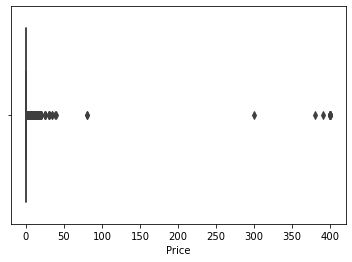

In [36]:
sns.boxplot(x="Price",data=df)

# Boxplot for Reviews

Are there any apps with very high number of reviews? Do the values seem right?

<AxesSubplot:xlabel='Reviews'>

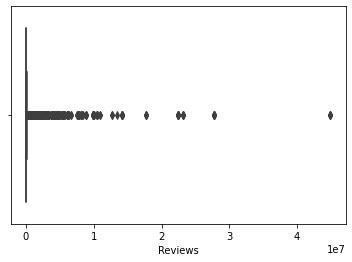

In [37]:
sns.boxplot(x="Reviews",data=df)

# Histogram for Rating

How are the ratings distributed? Is it more toward higher ratings?

(array([  17.,   18.,   39.,   72.,  132.,  408.,  781., 1406., 3212.,
        1632.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

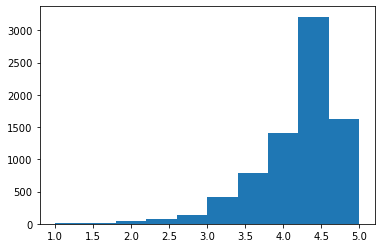

In [38]:
plt.hist(df.Rating)

# Histogram for Size

Note down your observations for the plots made above. Which of these seem to have outliers?

(array([3245., 1398.,  991.,  606.,  449.,  325.,  226.,  161.,  117.,
         199.]),
 array([8.500000e+00, 1.000765e+04, 2.000680e+04, 3.000595e+04,
        4.000510e+04, 5.000425e+04, 6.000340e+04, 7.000255e+04,
        8.000170e+04, 9.000085e+04, 1.000000e+05]),
 <BarContainer object of 10 artists>)

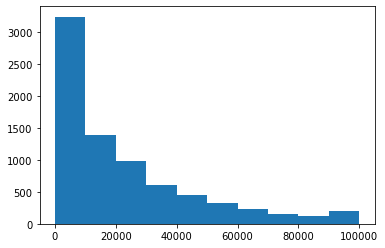

In [39]:
plt.hist(df.Size)

# 6. Outlier treatment: 

Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!

Check out the records with very high price

Is 200 indeed a high price?

Drop these as most seem to be junk apps

Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.

Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

Decide a threshold as cutoff for outlier and drop records having values more than that

In [40]:
df[df["Price"] >=200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [41]:
len(df[df["Price"] >=200])

15

In [42]:
df = df.drop(df.index[df["Price"] >=200])

In [43]:
df.drop(df.index[(df.Reviews>=2000000)], inplace=True)
len(df.index)

7483

In [44]:
np.percentile(df["Installs"],90)

10000000.0

In [45]:
install_99_perc = np.percentile(df["Installs"],99)

In [46]:
install_99_perc

50000000.0

In [47]:
df.drop(df.index[df.Installs >= install_99_perc],inplace=True)

In [48]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

# 7. Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

Make scatter plot/joinplot for Rating vs. Price

What pattern do you observe? Does rating increase with price?

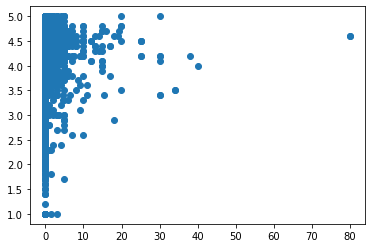

In [49]:
plt.scatter (x=df.Price, y=df.Rating)

# Make scatter plot/joinplot for Rating vs. Size

Are heavier apps rated better?

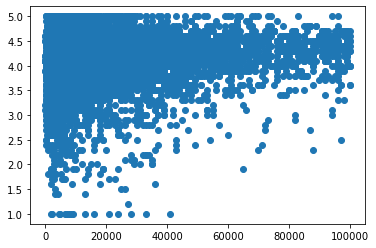

In [50]:
plt.scatter (x=df.Size, y=df.Rating)

# Make scatter plot/joinplot for Rating vs. Reviews

Does more review mean a better rating always?

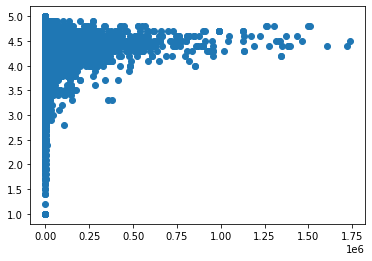

In [51]:
plt.scatter (x=df.Reviews, y=df.Rating)

# Make boxplot for Rating vs. Content Rating

Is there any difference in the ratings? Are some types liked better?

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

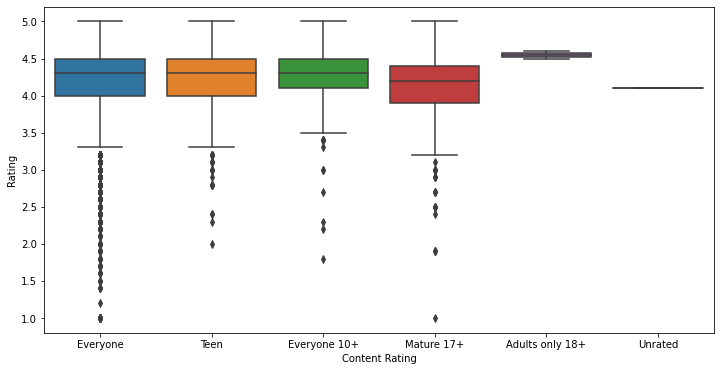

In [52]:
plt.figure(figsize=[12,6])
sns.boxplot(y='Rating',x='Content Rating',data=df)

# Make boxplot for Ratings vs. Category

Which genre has the best ratings?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'ART_AND_DESIGN'),
  Text(1, 0, 'AUTO_AND_VEHICLES'),
  Text(2, 0, 'BEAUTY'),
  Text(3, 0, 'BOOKS_AND_REFERENCE'),
  Text(4, 0, 'BUSINESS'),
  Text(5, 0, 'COMICS'),
  Text(6, 0, 'COMMUNICATION'),
  Text(7, 0, 'DATING'),
  Text(8, 0, 'EDUCATION'),
  Text(9, 0, 'ENTERTAINMENT'),
  Text(10, 0, 'EVENTS'),
  Text(11, 0, 'FINANCE'),
  Text(12, 0, 'FOOD_AND_DRINK'),
  Text(13, 0, 'HEALTH_AND_FITNESS'),
  Text(14, 0, 'HOUSE_AND_HOME'),
  Text(15, 0, 'LIBRARIES_AND_DEMO'),
  Text(16, 0, 'LIFESTYLE'),
  Text(17, 0, 'GAME'),
  Text(18, 0, 'FAMILY'),
  Text(19, 0, 'MEDICAL'),
  Text(20, 0, 'SOCIAL'),
  Text(21, 0, 'SHOPPING'),
  Text(22, 0, 'PHOTOGRAPHY'),
  Text(23, 0, 'SPORTS'),
  Text(24, 0, 'TRAVEL_AND_LOCAL'),
  Text(25, 0, 'TOOLS'),
  Text(26, 0, 'PERSONALIZATION'),
  Text(27, 0, 'PRODUCTIVITY'),
  Text(28, 0, 'PARENTING'),
  Text(

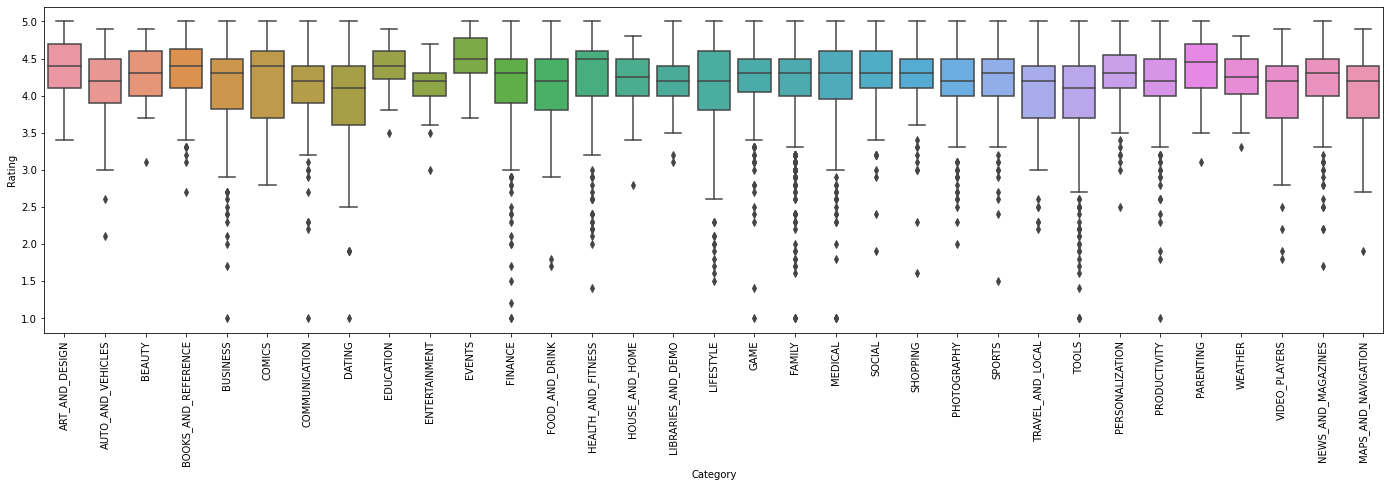

In [53]:
plt.figure(figsize=[24,6])
sns.boxplot(y='Rating',x='Category',data=df)
plt.xticks(rotation=90)

# 8. Data preprocessing

For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.

Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.

In [54]:
inp1=df
inp1.reset_index(drop=True,inplace=True)
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
4,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


# Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

In [55]:
inp1=df.copy()
inp1.Reviews=inp1.Reviews.apply(np.log1p)
inp1.Installs=inp1.Installs.apply(np.log1p)
inp1.drop(columns=['App','Last Updated','Current Ver','Android Ver'],inplace=True)

In [56]:
inp1.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,Free,0.0,Everyone,Art & Design
3,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,Free,0.0,Everyone,Art & Design;Creativity
4,ART_AND_DESIGN,4.4,5.123964,5600.0,10.819798,Free,0.0,Everyone,Art & Design


# Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

In [57]:
inp2 = pd.get_dummies(inp1)

In [58]:
inp2.head(2)

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Strategy;Education,Genres_Tools,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,4.1,5.075174,19000.0,9.210440,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
set(inp2.columns)

{'Category_ART_AND_DESIGN',
 'Category_AUTO_AND_VEHICLES',
 'Category_BEAUTY',
 'Category_BOOKS_AND_REFERENCE',
 'Category_BUSINESS',
 'Category_COMICS',
 'Category_COMMUNICATION',
 'Category_DATING',
 'Category_EDUCATION',
 'Category_ENTERTAINMENT',
 'Category_EVENTS',
 'Category_FAMILY',
 'Category_FINANCE',
 'Category_FOOD_AND_DRINK',
 'Category_GAME',
 'Category_HEALTH_AND_FITNESS',
 'Category_HOUSE_AND_HOME',
 'Category_LIBRARIES_AND_DEMO',
 'Category_LIFESTYLE',
 'Category_MAPS_AND_NAVIGATION',
 'Category_MEDICAL',
 'Category_NEWS_AND_MAGAZINES',
 'Category_PARENTING',
 'Category_PERSONALIZATION',
 'Category_PHOTOGRAPHY',
 'Category_PRODUCTIVITY',
 'Category_SHOPPING',
 'Category_SOCIAL',
 'Category_SPORTS',
 'Category_TOOLS',
 'Category_TRAVEL_AND_LOCAL',
 'Category_VIDEO_PLAYERS',
 'Category_WEATHER',
 'Content Rating_Adults only 18+',
 'Content Rating_Everyone',
 'Content Rating_Everyone 10+',
 'Content Rating_Mature 17+',
 'Content Rating_Teen',
 'Content Rating_Unrated',
 'G

# 9. Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.

In [60]:
from sklearn.model_selection import train_test_split
df_train, df_test=train_test_split(inp2,test_size=0.3,random_state=100)

# 10. Separate the dataframes into X_train, y_train, X_test, and y_test.

In [61]:
y_train=df_train.pop('Rating')
x_train=df_train

y_test=df_test.pop('Rating')
x_test=df_test

# 11 . Model building

Use linear regression as the technique

Report the R2 on the train set

In [62]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

from sklearn.metrics import r2_score
y_train_predict=lm.predict(x_train)
r2_score(y_train,y_train_predict)

0.15582597515293406

# 12. Make predictions on test set and report R2.

In [63]:
x_test_prect=lm.predict(x_test)
r2_score(y_test,x_test_prect)

0.13238538451714088